# Etapa 1: Preparando o Ambiente de Trabalho

In [28]:
import pandas as pd          # Para manipular tabelas de dados
import numpy as np           # Para cálculos matemáticos
import matplotlib.pyplot as plt  # Para criar visualizações

# Configuração para melhor visualização
pd.options.display.float_format = '{:,.2f}'.format

# Etapa 2: Carregando os Dados de Casos e População

In [29]:
# Dados de casos e óbitos
url_casos = "https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-states.csv"
df = pd.read_csv(url_casos, parse_dates=["date"])

# Observe o formato do dataframe
df.head()

,epi_week,date,country,state,city,newDeaths,deaths,newCases,totalCases,deathsMS,...,tests,tests_per_100k_inhabitants,vaccinated,vaccinated_per_100_inhabitants,vaccinated_second,vaccinated_second_per_100_inhabitants,vaccinated_single,vaccinated_single_per_100_inhabitants,vaccinated_third,vaccinated_third_per_100_inhabitants
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9,2020-02-25,Brazil,TOTAL,TOTAL,0,0,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9,2020-02-26,Brazil,TOTAL,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Parsing
Parse (ou fazer o **_parsing_**) é o processo de pegar um conjunto de dados brutos (como um texto) e analisá-lo para extrair informações estruturadas que um programa consiga entender.No contexto do Pandas, o parâmetro **parse_dates** é usado para indicar ao computador que determinadas colunas devem ser tratadas como datas reais e não apenas como textos (strings) comuns.

Quando você carrega um arquivo CSV, o Pandas lê quase tudo como texto ou números simples por padrão. Se uma coluna contém **"2026-02-11"**, para o computador isso é apenas uma sequência de caracteres. Ao usar **parse_dates=["date"]**, você está instruindo o Pandas a realizar o **parsing** para converter esse texto em um objeto do tipo **datetime64**.

### Por que isso é importante?
- **Acessa partes da data**: Você pode extrair facilmente o dia da semana, o mês ou o ano de cada linha.

- **Ordenação Lógica**: O computador entende que "Janeiro de 2026" vem antes de "Fevereiro de 2026", o que nem sempre acontece na ordenação alfabética de textos.

- **Cálculos de Tempo**: Você pode subtrair uma data de outra para descobrir quantos dias se passaram entre dois eventos.

In [30]:
# Padronizando nomes das colunas
df = df.rename(columns={
    'state':'uf',
    'newCases':'novos_casos',
    'newDeaths':'novos_obitos'
})

df.head()

,epi_week,date,country,uf,city,novos_obitos,deaths,novos_casos,totalCases,deathsMS,...,tests,tests_per_100k_inhabitants,vaccinated,vaccinated_per_100_inhabitants,vaccinated_second,vaccinated_second_per_100_inhabitants,vaccinated_single,vaccinated_single_per_100_inhabitants,vaccinated_third,vaccinated_third_per_100_inhabitants
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9,2020-02-25,Brazil,TOTAL,TOTAL,0,0,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9,2020-02-26,Brazil,TOTAL,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
# Removendo dados agregados nacionais
df = df[df['uf']!='TOTAL']
display(df.head())

print('✅ Dados carregados!')
print(f'{len(df)} linhas de dados')
print(f'{df['uf'].nunique()-1} estados + DF')
print(f'Período: {df['date'].min().date()} até {df['date'].max().date()}')

,epi_week,date,country,uf,city,novos_obitos,deaths,novos_casos,totalCases,deathsMS,...,tests,tests_per_100k_inhabitants,vaccinated,vaccinated_per_100_inhabitants,vaccinated_second,vaccinated_second_per_100_inhabitants,vaccinated_single,vaccinated_single_per_100_inhabitants,vaccinated_third,vaccinated_third_per_100_inhabitants
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


✅ Dados carregados!
29724 linhas de dados
26 estados + DF
Período: 2020-02-25 até 2023-03-18


In [32]:
#População por UF — Censo 2022 (SIDRA tabela 4714)
url_pop = "https://apisidra.ibge.gov.br/values/t/4714/p/2022/n3/all/v/93?formato=json"
pop = pd.read_json(url_pop)
pop.head()

,NC,NN,MC,MN,V,D1C,D1N,D2C,D2N,D3C,D3N
0,Nível Territorial (Código),Nível Territorial,Unidade de Medida (Código),Unidade de Medida,Valor,Ano (Código),Ano,Unidade da Federação (Código),Unidade da Federação,Variável (Código),Variável
1,3,Unidade da Federação,45,Pessoas,1581196,2022,2022,11,Rondônia,93,População residente
2,3,Unidade da Federação,45,Pessoas,830018,2022,2022,12,Acre,93,População residente
3,3,Unidade da Federação,45,Pessoas,3941613,2022,2022,13,Amazonas,93,População residente
4,3,Unidade da Federação,45,Pessoas,636707,2022,2022,14,Roraima,93,População residente


In [33]:
# A primeira linha do SIDRA é metadado; removemos com iloc[1:]
pop = pop.rename(columns={"D2C": "uf_cod", "D2N": "uf_nome", "V": "populacao"}).iloc[1:]
pop.head()

,NC,NN,MC,MN,populacao,D1C,D1N,uf_cod,uf_nome,D3C,D3N
1,3,Unidade da Federação,45,Pessoas,1581196,2022,2022,11,Rondônia,93,População residente
2,3,Unidade da Federação,45,Pessoas,830018,2022,2022,12,Acre,93,População residente
3,3,Unidade da Federação,45,Pessoas,3941613,2022,2022,13,Amazonas,93,População residente
4,3,Unidade da Federação,45,Pessoas,636707,2022,2022,14,Roraima,93,População residente
5,3,Unidade da Federação,45,Pessoas,8120131,2022,2022,15,Pará,93,População residente


In [34]:
# Garantindo tipos numéricos corretos
pop["uf_cod"] = pd.to_numeric(pop["uf_cod"], errors="coerce").astype("Int64")
pop["populacao"] = pd.to_numeric(pop["populacao"], errors="coerce").astype("Int64")

print(f"✅ População carregada: {len(pop)} UFs")

✅ População carregada: 27 UFs


In [35]:
# Mapa de códigos para siglas de UF
url_ufs = "https://servicodados.ibge.gov.br/api/v1/localidades/estados"
ufs = pd.read_json(url_ufs)[["id", "sigla", "nome"]].rename(
    columns={"id": "uf_cod", "sigla": "uf", "nome": "uf_nome"}
)
ufs["uf_cod"] = ufs["uf_cod"].astype("Int64")
display(ufs)

,uf_cod,uf,uf_nome
0,11,RO,Rondônia
1,12,AC,Acre
2,13,AM,Amazonas
3,14,RR,Roraima
4,15,PA,Pará
5,16,AP,Amapá
6,17,TO,Tocantins
7,21,MA,Maranhão
8,22,PI,Piauí
9,23,CE,Ceará


## O que fizemos aqui?
Carregamos os dados com ``read_json`` e já aplicamos algumas transformações importantes:

- **Seleção de Colunas**: Filtramos apenas o nescessário (``id``, ``sigla``, ``nome``)
- **Renomeação**: Padronizamos os nomes
- **Tipagem**: Garantiu que o código da UF seja tratado como um inteiro que aceita valores nulos (``Int64``).

In [36]:
# Une população (por código) com sigla de UF
pop = pop.merge(ufs[["uf_cod", "uf"]], on="uf_cod", how="left")
pop = pop[["uf_cod", "uf", "uf_nome", "populacao"]]
display(pop)

print("✅ Dados prontos para análise!")

,uf_cod,uf,uf_nome,populacao
0,11,RO,Rondônia,1581196
1,12,AC,Acre,830018
2,13,AM,Amazonas,3941613
3,14,RR,Roraima,636707
4,15,PA,Pará,8120131
5,16,AP,Amapá,733759
6,17,TO,Tocantins,1511460
7,21,MA,Maranhão,6776699
8,22,PI,Piauí,3271199
9,23,CE,Ceará,8794957


✅ Dados prontos para análise!


# Etapa 3: Unindo Dados com Merge

## Como funciona o Merge ?
No merge existe o **DataFrame da esquerda** e o **DataFrame da direita**.

``pop``(esquerda) ➡️ ``.merge()`` (ação) ➡️ ``ufs`` (direita)

Isso define a "âncora" da sua operação, especialmente quando usamos o ``how="left"``.

- **DataFrame da Esquerda (pop)**: É a sua base principal. O Pandas garante que todas as linhas dele permaneçam no resultado final, não importa o que aconteça.

- **DataFrame da Direita (ufs)**: É a tabela de consulta. O Pandas vai lá apenas para buscar informações que se encaixem na "ponte" (uf_cod) que você definiu.

### Mas como de fato isso funciona?
Para acontecer o **merge** o Pandas vai precisar de um parâmetro **"ponte"** que é passado para o o argumento 
**on="uf_cod"** e que indica ao Pandas que essa é a coluna comum entre os dois DataFrames (``pop`` e ``ufs``) que deve ser usada para alinhar as linhas corretamente.

Fazendo ``ufs[["uf_cod", "uf"]]`` filtramos e garantimos que apenas as colunas ``uf_cod`` e ``uf`` do **uf** serão puxadas para o DataFrame da esquerda. Como passamos ``"uf_cod"`` como parâmetro ponte, o pandas entende que essa coluna deve servir como **elo de ligação** entre as duas tabelas. Então, em vez de criar duas colunas idênticas, ele as "funde" em uma única coluna no DataFrame final.

### Como a união funciona?
Existem quatro formas principais de combinar os dados, definidas pelo parâmetro ``how``:

- **inner**: Mantém apenas as chaves que existem em ambos os DataFrames.
- **left**: Mantém todas as linhas do DataFrame da esquerda e adiciona correspondências da direita.
- **right**: Mantém todas as linhas do DataFrame da direita e adiciona correspondências da esquerda.
- **outer** : Mantém todas as linhas de ambos, preenchendo com NaN onde não há correspondência.


In [37]:
# Unindo Dados de Casos com Populações
df = df.merge(pop[['uf','populacao']], on='uf', how='left')
df.head()

,epi_week,date,country,uf,city,novos_obitos,deaths,novos_casos,totalCases,deathsMS,...,tests_per_100k_inhabitants,vaccinated,vaccinated_per_100_inhabitants,vaccinated_second,vaccinated_second_per_100_inhabitants,vaccinated_single,vaccinated_single_per_100_inhabitants,vaccinated_third,vaccinated_third_per_100_inhabitants,populacao
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44411238
1,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44411238
2,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44411238
3,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44411238
4,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44411238


In [38]:
# Verificando o resultado
exemplo = df[df["uf"] == "SP"].iloc[0]
print(f"   São Paulo em {exemplo['date'].date()}:")
print(f"   • Novos casos: {exemplo['novos_casos']:,.0f}")
print(f"   • População: {exemplo['populacao']:,.0f}")

   São Paulo em 2020-02-25:
   • Novos casos: 1
   • População: 44,411,238


In [39]:
# Limpeza de dados
df["populacao"] = df["populacao"].replace(0, np.nan)
df["novos_casos"] = df["novos_casos"].clip(lower=0).fillna(0)
df["novos_obitos"] = df["novos_obitos"].clip(lower=0).fillna(0)

# Etapa 4: Criando Indicadores Comparáveis

In [40]:
# Criando taxas por 100mil habitantes
df['casos_100k'] = (df['novos_casos']/df['populacao'])*100_000
df['obitos_100k'] = (df['novos_obitos']/df['populacao'])*100_000

In [41]:
# Encontrando um dia com muitos casos para comparação
# Vamos pegar um dia próximo do pico da segunda onda (março/2021)
data_exemplo = pd.to_datetime('2021-03-15')
exemplo_dia = df[df['date']==data_exemplo]

In [42]:
# List to store the extracted rows
rows_list = []

# Target states for extraction
ufs_to_extract = ['SP', 'RR', 'AM', 'DF']

for uf in ufs_to_extract:
    # Filter the original data for the specific UF
    dados = exemplo_dia[exemplo_dia['uf'] == uf]
    
    if not dados.empty:
        # Get the first record found for this UF
        first_row = dados.iloc[0]
        
        # Create a dictionary representing the new row
        new_row = {
            'UF': uf,
            'Populacao': first_row['populacao'],
            'Casos_Brutos': first_row['novos_casos'],
            'Casos/100k': first_row['casos_100k']
        }
        
        # Add to our temporary list
        rows_list.append(new_row)

# Create the final DataFrame from the list of dictionaries
data_frame = pd.DataFrame(rows_list)

# Display the result
display(data_frame)

,UF,Populacao,Casos_Brutos,Casos/100k
0,SP,44411238,5259,11.84
1,RR,636707,166,26.07
2,AM,3941613,541,13.73
3,DF,2817381,2056,72.98


Perceba que, mesmo que o número de **casos brutos** em **SP** fosse maior, naquele dia a situação estava muito mais
crítica em **RR** e **DF**. Então, a normalização revela a verdade escondida nos números. Estados menores podem estar em situação muito mais crítica mesmo com menos casos absolutos!

## Vamos entender o que fizemos

- ``rows_list = []`` : Cria uma lista vazia que servirá como um recipiente temporário para armazenar os dados de cada estado antes de criar a tabela final.

- ``ufs_to_extract = ['SP', 'RR', 'AM', 'DF']`` : Define uma lista de busca com as siglas das Unidades Federativas (UFs) que queremos encontrar.

- ``dados = exemplo_dia[exemplo_dia['uf'] == uf]`` : Realiza um filtro na tabela original (**exemplo_dia**). Ele busca todas as linhas onde a coluna 'uf' é igual ao estado atual do laço.

- ``if not dados.empty:`` : Verifica se o filtro retornou algum resultado. Se o estado não existir nos dados, ele pula para o próximo.

- ``first_row = dados.iloc[0]`` : Seleciona a primeira linha encontrada para aquele estado. O .``iloc[0]`` acessa a posição inicial dos dados filtrados.

- ``new_row = { ... }`` : Cria um dicionário. Aqui definimos as "chaves" (nomes das novas colunas) e os "valores" (dados extraídos da first_row).

- ``rows_list.append(new_row)`` : Adiciona o dicionário criado à nossa lista ``rows_list``. É como colocar uma ficha preenchida dentro de uma pasta.

- ``data_frame = pd.DataFrame(rows_list)`` : Converte a lista de fichas em um DataFrame oficial do pandas, organizando tudo em colunas e linhas.

# Etapa 5: Suavizando com Média Móvel e Visualizando

In [43]:
# Ordenando por UF e data (essencial!)
df = df.sort_values(['uf', 'date'])

df['mm7_casos_100k'] = (df.groupby('uf')['casos_100k'].transform(lambda x: x.rolling(7, min_periods=1).mean()))
df["mm7_obitos_100k"] = (df.groupby("uf")["obitos_100k"].transform(lambda x: x.rolling(7, min_periods=1).mean()))

# Escolhendo um Estado e período para demonstrar
uf_demo = 'RJ'
inicio = pd.to_datetime("2021-02-01")
fim = pd.to_datetime("2021-04-30")

dados_demo = df[(df["uf"] == uf_demo) & 
                 (df["date"] >= inicio) & 
                 (df["date"] <= fim)]

## O que fizemos?
### O que é lambda?
``lambda`` é a palavra-chave para criação de funções anônimas em Python, isto é, funções que não tem nome definido. Elas são ideais para operações simples e rápidas que você só vai usar em um único lugar do código. A estrutura básica de uma função lambda é: 

**_lambda_** argumentos **_:_** expressão

Essas funções anônimas geralmente não são guardadas em variáveis mas passadas diretamente como argumento para 
outras funções.

### Vamos ver cada pedaço
- ``df['mm_casos_100k'] = ...``: 	Cria uma nova coluna no seu DataFrame para guardar o resultado da média móvel.
- ``df.groupby('uf')``:	Agrupa os dados pelo estado. Isso garante que a média de SP não se misture com a do RJ.
- ``['casos_100k']``:	Seleciona a coluna específica sobre a qual queremos fazer o cálculo.
- ``.transform(...)``:	Aplica uma função e mantém o tamanho original da tabela (diferente do sum ou mean comum, que reduziria a tabela).
- ``.rolling(7, min_periods=1)``:	Cria uma "janela" que desliza pelos dados. O 7 define o tamanho da janela e o min_periods=1 permite calcular a média mesmo que ainda não tenhamos 7 dias de dados (no início da série).
- ``.mean()``: Calcula a média aritmética dos valores dentro dessa janela de 7 dias.
### Entendendo a "Mágica" do Lambda
A parte mais abstrata aqui é o lambda x. Imagine que o groupby separou sua tabela em várias "mini-tabelas", uma para cada estado. O transform pega cada uma dessas mini-tabelas e diz: "Ei, Lambda, faça sua mágica aqui dentro!".
Se estivéssemos falando apenas do estado de São Paulo, o x dentro do lambda seria a série temporal de casos apenas de SP.


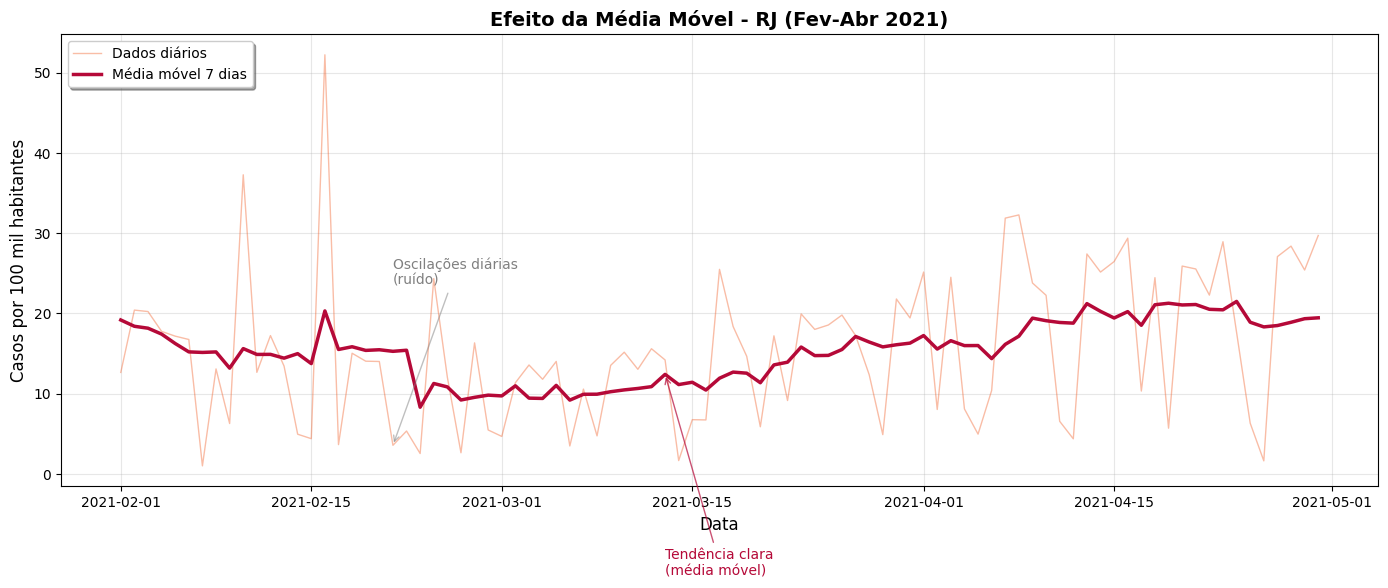

In [44]:
# Criando o gráfico
fig, ax = plt.subplots(figsize=(14, 6))

# Dados diários (com transparência)
ax.plot(dados_demo["date"], dados_demo["casos_100k"], 
        label="Dados diários", color="#F15A22", alpha=0.4, linewidth=1)

# Média móvel (linha sólida)
ax.plot(dados_demo["date"], dados_demo["mm7_casos_100k"], 
        label="Média móvel 7 dias", color="#B50938", linewidth=2.5)

ax.set_title(f"Efeito da Média Móvel - {uf_demo} (Fev-Abr 2021)", 
             fontsize=14, fontweight='bold')
ax.set_xlabel("Data", fontsize=12)
ax.set_ylabel("Casos por 100 mil habitantes", fontsize=12)
ax.legend(loc='upper left', frameon=True, shadow=True)
ax.grid(True, alpha=0.3)

# Anotação explicativa
ax.annotate('Oscilações diárias\n(ruído)', 
            xy=(dados_demo.iloc[20]['date'], dados_demo.iloc[20]['casos_100k']),
            xytext=(dados_demo.iloc[20]['date'], dados_demo.iloc[20]['casos_100k'] + 20),
            arrowprops=dict(arrowstyle='->', color='gray', alpha=0.5),
            fontsize=10, color='gray')

ax.annotate('Tendência clara\n(média móvel)', 
            xy=(dados_demo.iloc[40]['date'], dados_demo.iloc[40]['mm7_casos_100k']),
            xytext=(dados_demo.iloc[40]['date'], dados_demo.iloc[40]['mm7_casos_100k'] - 25),
            arrowprops=dict(arrowstyle='->', color='#B50938', alpha=0.7),
            fontsize=10, color='#B50938')

plt.tight_layout()
plt.show()

# Etapa 6: Visualizações Avançadas

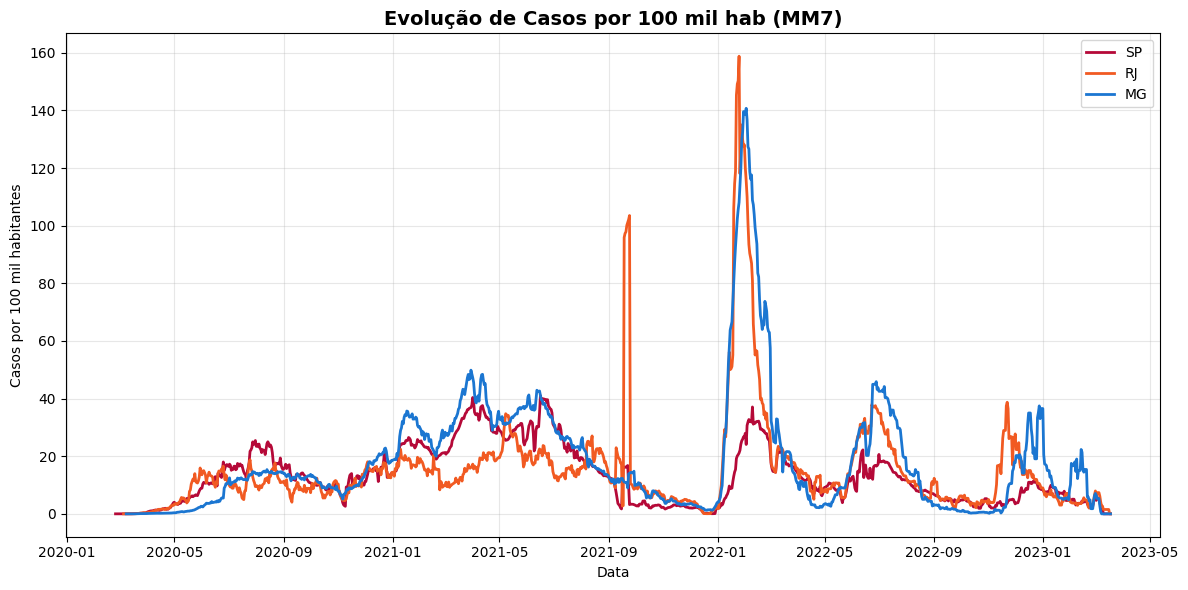

In [45]:
# Comparando 3 estados
estados = ["SP", "RJ", "MG"]
cores = ["#B50938", "#F15A22", "#1b76d1"]  # Cores Insper + azul

fig, ax = plt.subplots(figsize=(12, 6))
for estado, cor in zip(estados, cores):
    dados = df[df["uf"] == estado]
    ax.plot(dados["date"], dados["mm7_casos_100k"], 
            label=estado, color=cor, linewidth=2)

ax.set_title("Evolução de Casos por 100 mil hab (MM7)", fontsize=14, fontweight='bold')
ax.set_xlabel("Data")
ax.set_ylabel("Casos por 100 mil habitantes")
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()